In [1]:
from haystack import Pipeline, PredefinedPipeline
from haystack.document_stores.in_memory import InMemoryDocumentStore
from haystack.components.retrievers.in_memory import InMemoryBM25Retriever
from haystack.components.builders import PromptBuilder
from haystack.components.generators import OpenAIGenerator

/Users/apple/Documents/haystack-book/.venv/lib/python3.9/site-packages/ddtrace/internal/module.py:220: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  self.loader.exec_module(module)


## Predefined Pipeline

In [2]:
rag_pipeline_predefined_template = Pipeline.from_template(
    PredefinedPipeline.RAG
)

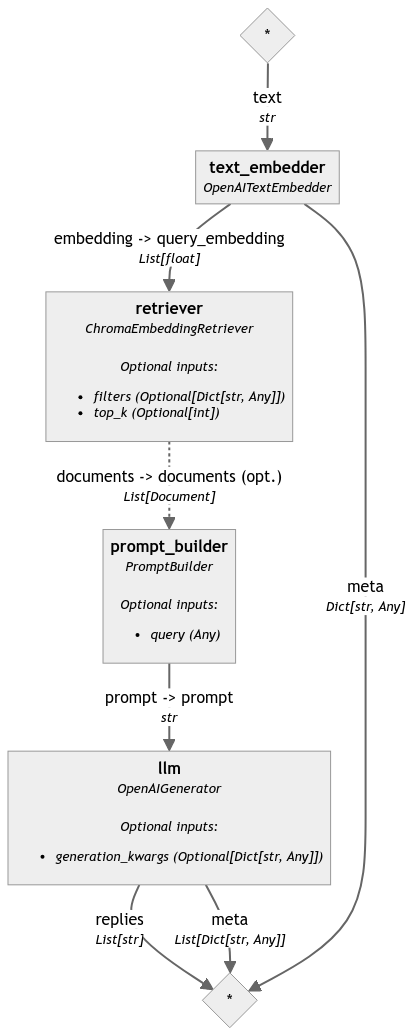

In [3]:
rag_pipeline_predefined_template.show()

In [4]:
rag_pipeline_predefined_template.dumps()

'components:\n  llm:\n    init_parameters:\n      api_base_url: null\n      api_key:\n        env_vars:\n        - OPENAI_API_KEY\n        strict: true\n        type: env_var\n      generation_kwargs: {}\n      model: gpt-3.5-turbo\n      streaming_callback: null\n      system_prompt: null\n    type: haystack.components.generators.openai.OpenAIGenerator\n  prompt_builder:\n    init_parameters:\n      template: \'\n\n        "Given these documents, answer the question.\n\n        Documents:\n\n        {% for doc in documents %}\\\n\n        {{ doc.content }}\n\n        {% endfor %}\n\n        Question: {{query}}\n\n\n        Answer:"\n\n        \'\n    type: haystack.components.builders.prompt_builder.PromptBuilder\n  retriever:\n    init_parameters:\n      document_store:\n        init_parameters:\n          collection_name: documents\n          embedding_function: default\n          persist_path: .\n        type: haystack_integrations.document_stores.chroma.document_store.ChromaDocume

## Custom Pipeline

In [6]:
document_store = InMemoryDocumentStore()

In [7]:
retriever = InMemoryBM25Retriever(document_store=document_store)

In [8]:
template = """
Given the following information, answer the question.

Context:
{% for document in documents %}
    {{ document.content }}
{% endfor %}

Question: {{question}}
Answer:
"""

prompt_builder = PromptBuilder(template=template)

In [9]:
generator = OpenAIGenerator(model="gpt-3.5-turbo")

In [10]:
rag_pipeline_custom_template = Pipeline()

In [11]:
rag_pipeline_custom_template.add_component("retriever", retriever)
rag_pipeline_custom_template.add_component("prompt_builder", prompt_builder)
rag_pipeline_custom_template.add_component("llm", generator)

In [12]:
rag_pipeline_custom_template.connect("retriever", "prompt_builder.documents")
rag_pipeline_custom_template.connect("prompt_builder", "llm")

🚅 Components
  - retriever: InMemoryBM25Retriever
  - prompt_builder: PromptBuilder
  - llm: OpenAIGenerator
🛤️ Connections
  - retriever.documents -> prompt_builder.documents (List[Document])
  - prompt_builder.prompt -> llm.prompt (str)

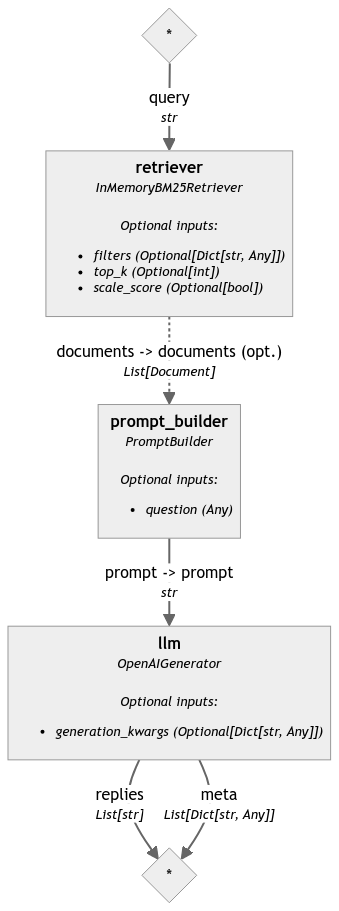

In [13]:
rag_pipeline_custom_template.show()